In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
from tqdm import tqdm

class SGD:
    def __init__(self, dataFile='../Data/wine/wine.data', beta1=1000000, beta2=10000000, alpha=0.000001, epsilon=0.01, times=2500, bench_size=300):
        self.dataFile = dataFile
        self.data = []
        self.beta1 = beta1
        self.beta2 = beta2
        self.alpha = alpha
        self.times = times
        self.value = []
        self.epsilon = epsilon
        self.bench_size = bench_size
        self.M = np.identity(13)
        self.get_info(self.dataFile)
    def get_info(self, dataFile):
        with open(dataFile) as f:
            line = f.readline()
            while line:
                data = line[:-1].split(',')
                self.data.append([float(i) for i in data])
                line = f.readline()
        data = np.array(self.data)
        for i in range(1, 14):
            data[:, i] = (data[:, i] - np.mean(data[:, i]))/ np.std(data[:, i])
        self.data = list(itertools.product(data, repeat=2))
        self.num = len(self.data)
        
    def get_loss(self, M):
        total = 0
        for x_i, x_j in self.data:
            loss = 0
            diff = x_i[1:]-x_j[1:]
            diff = np.mat(diff)
            dist = np.dot(np.dot(diff, self.M), diff.T)[0, 0]
            if x_i[0] == x_j[0]:
                loss += dist
            elif dist < 1:
                loss += self.beta1 * (1-dist)
            if dist < 0:
                loss -= self.beta2 * dist
            total += loss/self.num
        return total
    
    def solve(self):
        error = self.get_loss(self.M)
        for _ in tqdm(range(self.times)):
            data = random.sample(self.data, self.bench_size)
            delta_M = np.zeros([13, 13])
            for x_i, x_j in data:
                temp = x_i[1:]-x_j[1:]
                temp = np.mat(temp)
                if x_i[0] == x_j[0]:
                    delta_M += np.dot(temp.T, temp)
                elif np.dot(np.dot(temp, self.M), temp.T) < 1:
                    delta_M -= self.beta1*np.dot(temp.T, temp)
                if np.dot(np.dot(temp, self.M), temp.T) < 0:
                    delta_M -= self.beta2*np.dot(temp.T, temp)
            
            alpha = self.alpha
            self.M = self.M-alpha*delta_M
            
            # self.M = (M_new+M_new.T)/2
            error = self.get_loss(self.M)
            self.value.append(error)
            # print(error)
            if error < self.epsilon:
                return

    def draw(self):
        x = range(self.times)
        y = self.value
        plt.plot(x, y, label="Train_Loss_list")
        plt.show()
        
a = SGD()

In [2]:
a.solve()

100%|██████████| 10000/10000 [1:10:38<00:00,  2.36it/s]


In [ ]:
a.draw()

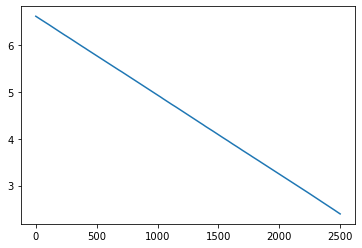

In [12]:
x = range(a.times)[:2500]
y = [i[0,0] for i in a.value][:2500]
plt.plot(x, y, label="Train_Loss_list")
plt.show()

In [ ]:
print(a)